# Градиентный спуск

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

Сгенерируем выборку для задачи регрессии и визуализируем данные

(100,)
(100, 1)


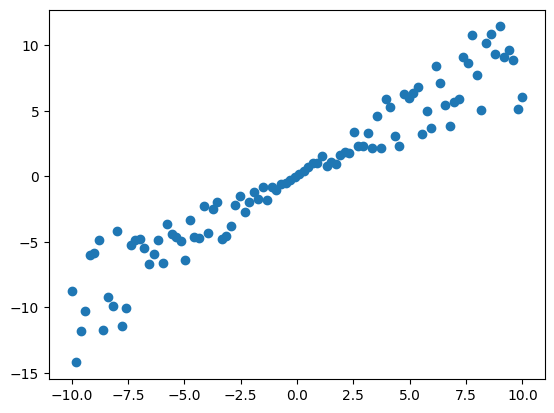

In [2]:
np.random.seed(42)

X = np.linspace(-10,10,100)

print(X.shape)

y = X * (np.random.random_sample(len(X)) + 0.5)
X = X.reshape(len(X), 1)

print(X.shape)

plt.scatter(X, y);

Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели.
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами. Здесь мы  воспользуемся готовой функцией из библиотеку numpy - numpy.linalg.norm.

In [3]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем градиентный спуск по формуле

$$w_{new} = w_{prev} - \eta\nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=\frac2m X^T(Xw-y).$$

Итак, реализуем метод градиентного спуска:

*  первым шагом добавим к матрице $X$ единичный столбец - это константный признак, равный 1 на всех объектах. Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$

В python скалярное произведение можно записать так: $w@x$

*  затем инициализируем случайным образом вектор весов params

*  зададим пустой массив cost_track, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

## Задание 1

Добавьте в функцию градиентного спуска из семинара L2-регуляризацию.

В этом случае градиент будет считаться по формуле

$$\nabla_w Q(w)=\frac2m (X^T(Xw-y)+\lambda w).$$

Добавьте в функцию `gradient_descent` гиперпараметр `lambda_`, задайте его по умолчанию равным нулю.

In [ ]:
def gradient_descent(X, y, learning_rate, iterations, ...):

    # your code here

## Задание 2

Модифицируйте функцию из задания 1 так, чтобы она осуществляла стохастический градиентный спуск - назовите новую функцию `stochastic_gradient_descent` (она также должна учитывать регуляризацию).

* в стохастическом градиентном спуске на каждой итерации метода мы выбираем случайный объект - пусть это будет индекс случайного объекта `ind`

* затем применяем обычный градиентный спуск, но с условием, что градиент считается не по всем объектам, а только по объекту с индексом `ind`, поэтому в формуле для обновления весов должно произойти два изменения:
  - мы обращаемся не ко всей матрице `X`, а только к одному объекту.

  **Подсказка:** чтобы матричная запись не поменялась, мы можем объявить новую матрицу `X_ind = X[ind, :].reshape(-1,1)` и работать с ней.
  - при вычислении градиента по одному объекту делить результат на число объектов `m` не требуется.

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate, iterations, ...):

    X = ... # добавляем в матрицу X столбец из единиц

    params = np.random.rand(X.shape[1]) # инициализация весов

    # your code here

Создадим функцию для получения предсказания модели

In [ ]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

## Вопрос 1

Примените функцию `gradient_descent` без регуляризации, с шагом 0.01 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
# your code here

## Вопрос 2

Примените функцию `gradient_descent` с коэффициентом регуляризации 1000, с шагом 0.01 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
# your code here

## Вопрос 3

Примените функцию `stochastic_gradient_descent` без регуляризации, с шагом 0.001 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
np.random.seed(42)

# your code here

## Вопрос 4

Примените функцию `stochastic_gradient_descent` с коэффициентом регуляризации 100, с шагом 0.001 и 100 итерациями.

Чему равен наибольший вес модели? Ответ округлите до сотых.

In [ ]:
np.random.seed(42)

# your code here

## Вопрос 5

Нарисуйте ошибку в зависимости от номера итерации для GD и SGD на одной картинке. Используйте для обучения в обоих случаях `learning_rate=0.001, iterations=100, lambda_=0.`

Можно ли сказать, что оба графика монотонно убывают?

In [ ]:
# your code here

## Задание (бонус, без проверки)

Реализуйте стохастический градиентный спуск с регуляризацией в виде класса. Протестируйте его.

In [ ]:
# your code here